# Embedded Questions - Non-Finite clauseType

In this Notebook, I look at the breakdown of verbs in each kind of questions to understand better the semantic content of different types of questions.

For each wh-question type, I look first at emb_verb, the code for the first verb in the question, then v2_after, and then mat_verb. 

In [1]:
from __future__ import division
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl 
import numpy as np
import re

In [2]:
df = pd.read_json("final_corpus.json")

In [3]:
len(df)

427079

In [4]:
# # Remove the Brown corpus
df = df[df.corpus != "brown"]

In [5]:
len(df) #422983

422983

In [6]:
df['emb_verb'] = df['emb_verb'].replace({'Can': 'can', 'CAN': 'can', 'WILL': 'will', 'Will': 'will', 'Could': 'could', 'Would':'would', 'Should': 'should'})
df['v1_after'] = df['v1_after'].replace({'Can': 'can', 'CAN': 'can', 'WILL': 'will', 'Will': 'will', 'Could': 'could', 'Would':'would', 'Should': 'should'})

In [7]:
emb = df[df.questType == "Embeded Question"]

In [8]:
# This makes the display show more info
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

In [10]:
nonfin = emb[emb.clauseType == "Non-Finite"]

In [11]:
len(nonfin)/len(emb)*100

8.342608787830603

# A. Non-Finite
This should only be root questions because non-finite clauses are not acceptable in roots

To do:
1. understand the distribution of embedded verbs
2. understand the distribution of different wh-words

In [12]:
nf_vs = nonfin.groupby('emb_verb').filter(lambda x: len(x) >= 100)

The thing here about finding all the verbs across the total non-finite df, is that you don't see how there are differences based on how the different wh-words are headed.

Ideally, then would have to do this for each wh

In [92]:
len(nonfin)

3148

In [95]:
nf_vs.groupby(["questType", "wh", "emb_verb"])["questType"].count()

questType         wh     emb_verb
Embeded Question  how    be          76 
                         do          209
                         get         112
                         go          33 
                         make        131
                         use         130
                  where  be          24 
                         do          2  
                         get         17 
                         go          58 
                         make        2  
                         use         2  
                  who    be          1  
                         go          11 
Name: questType, dtype: int64

In [13]:
nonfin_how = nonfin.loc[nonfin.wh.isin(["how"])]
nonfin_who = nonfin.loc[nonfin.wh.isin(["who"])]
nonfin_where = nonfin.loc[nonfin.wh.isin(["where"])]

In [123]:
len(nonfin_how)/len(nonfin)*100

84.62515883100382

In [124]:
len(nonfin_who)/len(nonfin)*100

1.8742058449809404

In [125]:
len(nonfin_where)/len(nonfin)*100

13.500635324015247

# A1. Non-Finite How-questions

In [55]:
nf_how_vs = nonfin_how.groupby('emb_verb').filter(lambda x: len(x) >= 40)
nf_how_vs_count = nf_how_vs.groupby(["clauseType","wh","emb_verb"])["emb_verb"].count().reset_index(name='count').sort_values(['count'], ascending=False)
nf_how_vs_count

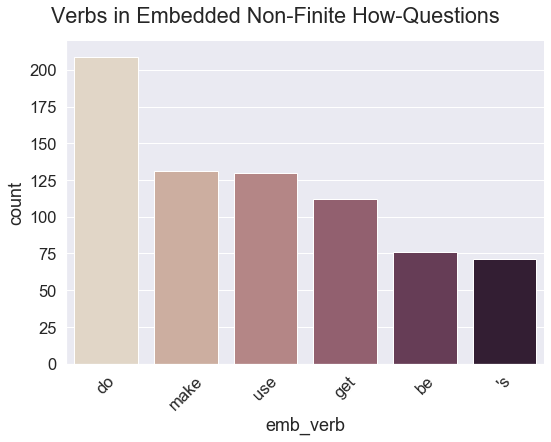

In [41]:
sns.set(font_scale=1.5)
g = sns.catplot(x="emb_verb", y="count", kind="bar", data=nf_how_vs_count, palette="ch:.25", height=6, aspect=8/6)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Verbs in Embedded Non-Finite How-Questions')
g.set_xticklabels(rotation=45)

plt.show()

In [42]:
# nonfin_how.loc[nonfin_how.emb_verb.isin(["use"])].sentence

# v2_after

In [63]:
nf_how_vs_v2 = nf_how_vs.groupby('v2_after').filter(lambda x: len(x) >= 10)
nf_how_vs_v2_count = nf_how_vs_v2.groupby(["emb_verb","v2_after"])["v2_after"].count().reset_index(name='count').sort_values(['count'], ascending=False)
nf_how_vs_v2.groupby(['emb_verb','v2_after'])['v2_after'].count()

emb_verb  v2_after
's                    68 
be                    21 
          was         1  
          ’           2  
do                    103
          's          8  
          do          8  
          is          5  
          was         9  
          ’           6  
get                   57 
          's          1  
          do          3  
          is          1  
          was         2  
          ’           2  
make                  62 
          's          1  
          do          1  
          is          3  
          ’           1  
use                   55 
          's          2  
          do          1  
          is          9  
          was         1  
          ’           3  
Name: v2_after, dtype: int64

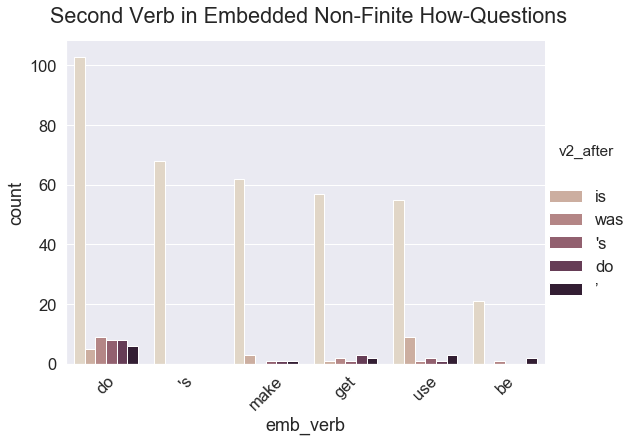

In [64]:
sns.set(font_scale=1.5)
g = sns.catplot(x="emb_verb", y="count",hue="v2_after", kind="bar", data=nf_how_vs_v2_count, palette="ch:.25", height=6, aspect=8/6)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Second Verb in Embedded Non-Finite How-Questions')
g.set_xticklabels(rotation=45)

plt.show()

# mat_verb

In [70]:
nf_how_vs_mv = nf_how_vs.groupby('mat_verb').filter(lambda x: len(x) >= 20)
nf_how_vs_mv_count = nf_how_vs_mv.groupby(["emb_verb","mat_verb"])["mat_verb"].count().reset_index(name='count').sort_values(['count'], ascending=False)
nf_how_vs_mv.groupby(["emb_verb",'mat_verb'])['mat_verb'].count()

emb_verb  mat_verb
's        be          3  
          know        31 
          learn       11 
be        be          4  
          know        21 
          learn       7  
do        be          9  
          know        110
          learn       27 
get       be          11 
          know        46 
          learn       4  
make      be          11 
          know        49 
          learn       17 
use       be          9  
          know        47 
          learn       22 
Name: mat_verb, dtype: int64

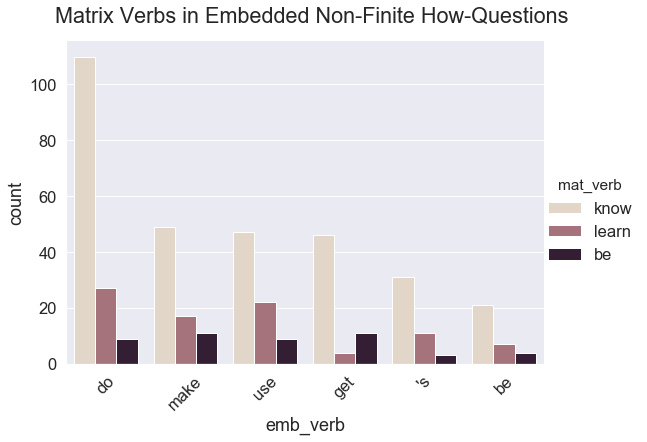

In [71]:
sns.set(font_scale=1.5)
g = sns.catplot(x="emb_verb", y="count", hue="mat_verb", kind="bar", data=nf_how_vs_mv_count, palette="ch:.25", height=6, aspect=8/6)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Matrix Verbs in Embedded Non-Finite How-Questions')
g.set_xticklabels(rotation=45)

plt.show()

# A2. Non-Finite Where Questions

In [79]:
nf_where_vs = nonfin_where.groupby('emb_verb').filter(lambda x: len(x) >= 20)
nf_where_vs_count = nf_where_vs.groupby(["clauseType","wh","emb_verb"])["emb_verb"].count().reset_index(name='count').sort_values(['count'], ascending=False)

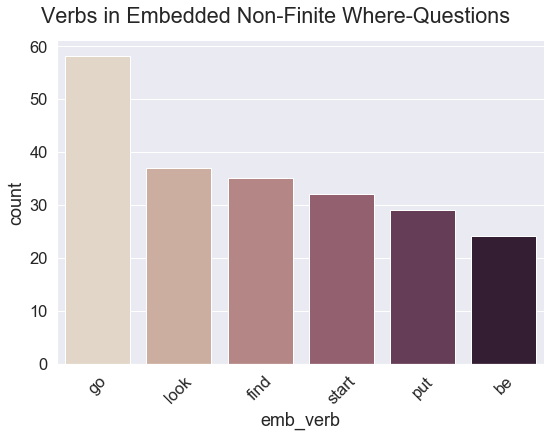

In [81]:
sns.set(font_scale=1.5)
g = sns.catplot(x="emb_verb", y="count", kind="bar", data=nf_where_vs_count, palette="ch:.25", height=6, aspect=8/6)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Verbs in Embedded Non-Finite Where-Questions')
g.set_xticklabels(rotation=45)

plt.show()

In [40]:
nf_where_vs_count

,clauseType,wh,emb_verb,count
2,Non-Finite,where,go,58
3,Non-Finite,where,look,37
1,Non-Finite,where,find,35
5,Non-Finite,where,start,32
4,Non-Finite,where,put,29
0,Non-Finite,where,be,24


In [391]:
# nonfin_where.loc[nonfin_where.emb_verb.isin(["be"])].sentence

# v2_after

In [95]:
nf_where_vs_v2 = nf_where_vs.groupby('v2_after').filter(lambda x: len(x) >= 5)
nf_where_vs_v2_count = nf_where_vs_v2.groupby(["emb_verb","v2_after"])["v2_after"].count().reset_index(name='count').sort_values(['count'], ascending=False)
nf_where_vs_v2.groupby(['emb_verb','v2_after'])['v2_after'].count()

emb_verb  v2_after
be                    6 
          do          1 
find                  18
          do          1 
          ’           2 
go                    34
          do          3 
          ’           1 
look                  15
          ’           3 
put                   13
start                 22
          ’           1 
Name: v2_after, dtype: int64

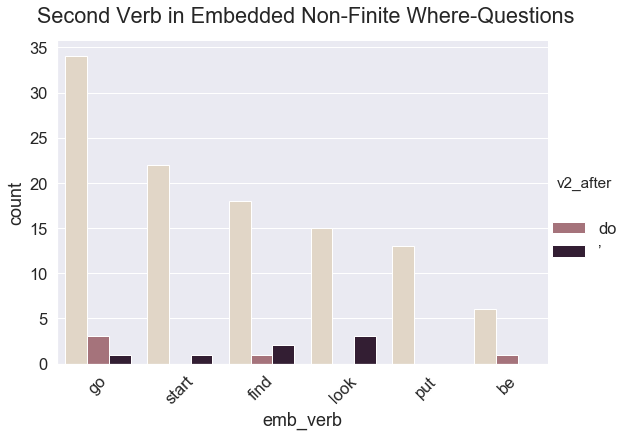

In [96]:
sns.set(font_scale=1.5)
g = sns.catplot(x="emb_verb", y="count",hue="v2_after", kind="bar", data=nf_where_vs_v2_count, palette="ch:.25", height=6, aspect=8/6)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Second Verb in Embedded Non-Finite Where-Questions')
g.set_xticklabels(rotation=45)

plt.show()

# mat_verb

In [98]:
nf_where_vs_mv = nf_where_vs.groupby('mat_verb').filter(lambda x: len(x) >= 10)
nf_where_vs_mv_count = nf_where_vs_mv.groupby(["emb_verb","mat_verb"])["mat_verb"].count().reset_index(name='count').sort_values(['count'], ascending=False)
nf_where_vs_mv.groupby(["emb_verb",'mat_verb'])['mat_verb'].count()

emb_verb  mat_verb
be        be          5 
          know        1 
find      know        33
go        be          2 
          know        33
look      be          1 
          know        34
put       be          2 
          know        17
start     be          1 
          know        24
Name: mat_verb, dtype: int64

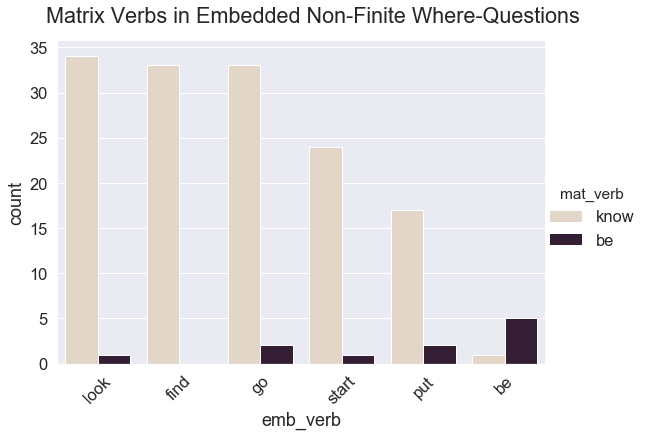

In [99]:
sns.set(font_scale=1.5)
g = sns.catplot(x="emb_verb", y="count", hue="mat_verb", kind="bar", data=nf_where_vs_mv_count, palette="ch:.25", height=6, aspect=8/6)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Matrix Verbs in Embedded Non-Finite Where-Questions')
g.set_xticklabels(rotation=45)

plt.show()

# A3. Non-Finite Who Questions

In [100]:
nf_who_vs = nonfin_who.groupby('emb_verb').filter(lambda x: len(x) >= 2)
nf_who_vs_count = nf_who_vs.groupby(["clauseType","wh","emb_verb"])["emb_verb"].count().reset_index(name='count').sort_values(['count'], ascending=False)
nf_who_vs_count

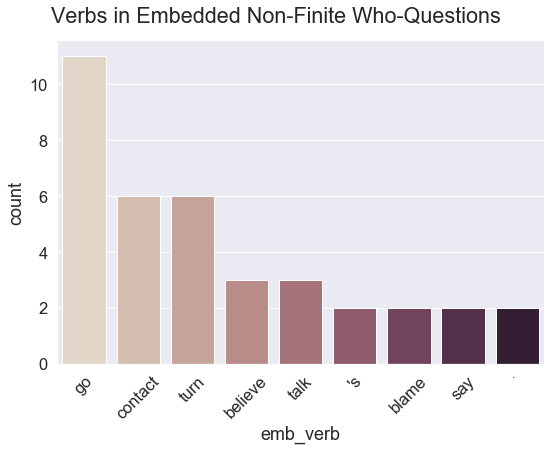

In [103]:
sns.set(font_scale=1.5)
g = sns.catplot(x="emb_verb", y="count", kind="bar", data=nf_who_vs_count, palette="ch:.25", height=6, aspect=8/6)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Verbs in Embedded Non-Finite Who-Questions')
g.set_xticklabels(rotation=45)

plt.show()

In [122]:
# nonfin_who.loc[nonfin_who.emb_verb.isin(["talk"])].sentence

# v2_after

In [111]:
nf_who_vs_v2 = nf_who_vs.groupby('v2_after').filter(lambda x: len(x) >= 3)
nf_who_vs_v2_count = nf_who_vs_v2.groupby(["emb_verb","v2_after"])["v2_after"].count().reset_index(name='count').sort_values(['count'], ascending=False)
nf_who_vs_v2.groupby(['emb_verb','v2_after'])['v2_after'].count()

emb_verb  v2_after
's                    2
believe               3
blame                 1
contact               4
go                    1
          featured    9
say                   2
turn                  4
’                     2
Name: v2_after, dtype: int64

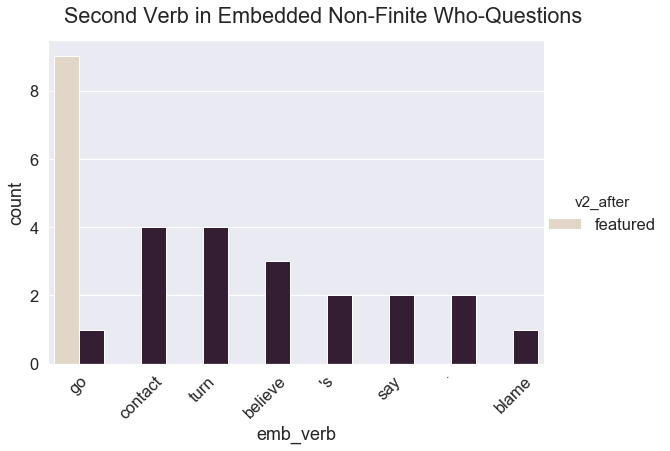

In [112]:
sns.set(font_scale=1.5)
g = sns.catplot(x="emb_verb", y="count",hue="v2_after", kind="bar", data=nf_who_vs_v2_count, palette="ch:.25", height=6, aspect=8/6)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Second Verb in Embedded Non-Finite Who-Questions')
g.set_xticklabels(rotation=45)

plt.show()

# mat_verb

In [119]:
nf_who_vs_mv = nf_who_vs.groupby('mat_verb').filter(lambda x: len(x) >= 2)
nf_who_vs_mv_count = nf_who_vs_mv.groupby(["emb_verb","mat_verb"])["mat_verb"].count().reset_index(name='count').sort_values(['count'], ascending=False)
nf_who_vs_mv.groupby(["emb_verb",'mat_verb'])['mat_verb'].count()

emb_verb  mat_verb
believe   know        3
blame     know        1
          wonder      1
contact   be          1
          find        1
          know        3
go        find        9
          know        2
say       know        2
talk      find        1
          know        2
turn      know        6
’         be          1
          wonder      1
Name: mat_verb, dtype: int64

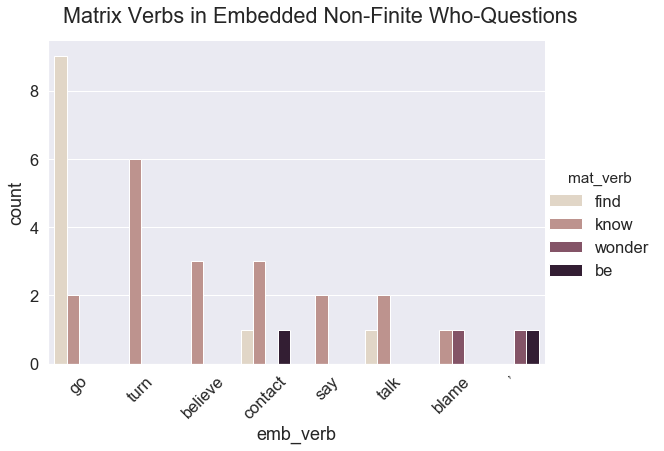

In [120]:
sns.set(font_scale=1.5)
g = sns.catplot(x="emb_verb", y="count", hue="mat_verb", kind="bar", data=nf_who_vs_mv_count, palette="ch:.25", height=6, aspect=8/6)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Matrix Verbs in Embedded Non-Finite Who-Questions')
g.set_xticklabels(rotation=45)

plt.show()